In [ ]:
%%capture
!pip install opendatasets roboflow

import opendatasets as od
from roboflow import Roboflow


In [ ]:
import shutil
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import  preprocess_input
from tensorflow.keras.applications import ResNet50,VGG19
from tensorflow.keras import layers as L
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.models import Sequential
import os
if os.path.exists('/content/sample_data'):
  shutil.rmtree('/content/sample_data')


DATA_DIR='/content/drive/MyDrive/CollectData'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Downloading Data

In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="aSWzkjnYOEuQEAEEW8D9")
# project = rf.workspace("skindisease").project("skin-disease-rt2")
# dataset = project.version(1).download("folder")


rf = Roboflow(api_key="aSWzkjnYOEuQEAEEW8D9")
def download_dataset(workspace, project):
    project = rf.workspace(workspace).project(project)
    dataset = project.version(1).download("folder")
    return dataset


dataset1 = download_dataset("classification", "skin-kmutr")
dataset2 = download_dataset("skindisease", "skin-disease-rt2")
dataset3 = download_dataset("skip", "skip")
dataset4 = download_dataset("mini-project-g4im3", "eczema-disease-classification-using-efficientnet-architecture")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to skin-1 in folder:: 100%|██████████| 1138/1138 [00:00<00:00, 7494.18it/s]

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to skin-disease-rt2-1 in folder:: 100%|██████████| 1261/1261 [00:00<00:00, 1876.02it/s]

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to SKIP-1 in folder:: 100%|██████████| 801/801 [00:00<00:00, 1899.48it/s]

loading Roboflow workspace...


loading Roboflow project...



Extracting Dataset Version Zip to Eczema-Disease-Classification-Using-EfficientNet-Architecture-1 in folder:: 100%|██████████| 1242/1242 [00:00<00:00, 1847.54it/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/pallapurajkumar/psoriasis-skin-dataset?select=PSORIASIS+AND+NORMAL+SKIN")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahmoudeldebase
Your Kaggle Key: ··········


100%|██████████| 199M/199M [00:02<00:00, 83.4MB/s]


In [ ]:
od.download("https://www.kaggle.com/datasets/farishamdani/25-type-of-skin/data")
# mahmoudeldebasebcc79a15e7113c8ad8e644b58603164fbcc79a15e7113c8ad8e644b58603164fbcc79a15e7113c8ad8e644b58603164f
# bcc79a15e7113c8ad8e644b58603164f

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: mahmoudeldebase
Your Kaggle Key: ··········
Your Kaggle Key: ··········
Your Kaggle Key: ··········
Your Kaggle Key: ··········


100%|██████████| 1.50G/1.50G [00:20<00:00, 79.3MB/s]


In [ ]:
# shutil.move('/content/25-type-of-skin/1.Training/Acne and Rosacea Photos','/content/drive/MyDrive/CollectData/train')
# shutil.move('/content/25-type-of-skin/1.Training/Hair Loss Photos Alopecia and other Hair Diseases','/content/drive/MyDrive/CollectData/train')
# shutil.move('/content/25-type-of-skin/1.Training/Psoriasis pictures Lichen Dermatosis and related diseases','/content/drive/MyDrive/CollectData/train')
# shutil.move('/content/25-type-of-skin/1.Training/Normal Skin','/content/drive/MyDrive/CollectData/train')
# shutil.move('/content/25-type-of-skin/1.Training/Eczema Photos','/content/drive/MyDrive/CollectData/train')

# shutil.move()

'/content/drive/MyDrive/CollectData/train/Eczema Photos'

In [ ]:
len(os.listdir('/content/drive/MyDrive/CollectData/train/Hair Loss Photos Alopecia and other Hair Diseases'))

252

In [ ]:
for i in os.listdir(DATA_DIR):
  if i.endswith('.jpg'):
    os.remove(os.path.join(DATA_DIR, i))

In [ ]:
os.listdir('/content/drive/MyDrive/CollectData/train/Hair Loss Photos Alopecia and other Hair Diseases')

[]

In [ ]:

def combine_folders(src_dir1, src_dir2):
    print('len src_dir1 :',len(os.listdir(src_dir1)))
    print('len src_dir2 :',len(os.listdir(src_dir2)))
    for src_dir in [src_dir1, src_dir2]:
        for filename in os.listdir(src_dir):
            if filename not in os.listdir(src_dir2):
              shutil.move(os.path.join(src_dir, filename), src_dir2)
    shutil.rmtree(src_dir1)


In [ ]:
combine_folders('/content/drive/MyDrive/CollectData/train/Hair Loss Photos Alopecia and other Hair Diseases'
                ,'/content/drive/MyDrive/CollectData/train/scalp infection scrapping'
                )

In [ ]:
combine_folders('/content/drive/MyDrive/CollectData/train/Psoriasis pictures Lichen Dermatosis and related diseases',
              '/content/drive/MyDrive/CollectData/train/Psoriasis'  )

len src_dir1 : 0
len src_dir2 : 4930


In [ ]:
combine_folders('/content/drive/MyDrive/CollectData/train/Normal Skin',
              '/content/drive/MyDrive/CollectData/train/Healthy-skin'  )

In [ ]:
combine_folders('/content/drive/MyDrive/CollectData/train/Eczema Photos',
              '/content/drive/MyDrive/CollectData/train/eczema'  )

In [ ]:
if not os.path.exists('/content/CollectData'):
  !mkdir CollectData



In [ ]:

def move_files(source_dir, target_dir,copy=False):
    files = os.listdir(source_dir)
    for file in files:
      if copy:
        shutil.copy(os.path.join(source_dir, file), target_dir)
      else:
        shutil.move(os.path.join(source_dir, file), target_dir)

### Cleaning Data


In [ ]:
removing_unused_classes=['/content/skin-1/train/skin cancer','/content/skin-1/valid/skin cancer'
                          '/content/skin-disease-rt2-1/train/Lichen Planus',
                          '/content/skin-disease-rt2-1/train/Lichen Sclerosus',
                         '/content/skin-disease-rt2-1/train/Lupus',
                         '/content/skin-disease-rt2-1/train/Melanoma',
                         '/content/skin-disease-rt2-1/train/Morphea',
                         '/content/skin-disease-rt2-1/train/Tinea',
                         '/content/skin-disease-rt2-1/train/Vitiligo',
                         '/content/skin-disease-rt2-1/train/Vasculitis',
                         '/content/skin-disease-rt2-1/train/Tumor Vascular',
                         '/content/skin-disease-rt2-1/train/Scabies',
                         '/content/skin-disease-rt2-1/train/Sclerosis Tuberous',
                         '/content/skin-disease-rt2-1/train/Urticaria',
                         '/content/skin-disease-rt2-1/train/Lichen Planus',
                         '/content/skin-disease-rt2-1/train/Onychomycosis',
                         '/content/skin-disease-rt2-1/train/Phototoxic Reaction',
                         '/content/skin-disease-rt2-1/train/Pityriasis Rosea'

]
for dir in removing_unused_classes:
  if os.path.exists(dir):
    shutil.rmtree(dir)

In [ ]:
tarin_data_dir='/content/drive/MyDrive/CollectData/train'
tarin_data=os.listdir('/content/drive/MyDrive/CollectData/train')
for i in tarin_data:
  if '.jpg' in i:
    os.remove(tarin_data_dir+'/'+i)

In [ ]:
tarin_data=os.listdir('/content/drive/MyDrive/CollectedDataV2')
tarin_data

['Rosacea',
 'Psoriasis',
 'Chronic Eczema',
 'skin acne',
 'PSORIASIS',
 'Acne and Rosacea Photos',
 'Eczema Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Normal Skin',
 'Psoriasis pictures Lichen Dermatosis and related diseases']

In [ ]:


def move_files_and_remove_empty_folder(src_imgs, main_folder):
    # Check if both the source and destination folders exist
    if os.path.exists(src_imgs) and os.path.exists(main_folder):
        # Get all files in the source folder
        files = os.listdir(src_imgs)
        for file in files:
            # Construct full file path
            src_file_path = os.path.join(src_imgs, file)
            # Move each file to destination folder
            shutil.move(src_file_path, main_folder)
        # Remove source folder
        os.rmdir(src_imgs)
    else:
        print("Either the source or the destination folder doesn't exist")

# eczema
# main_folder = "/content/CollectData/eczema"

# move_files_and_remove_empty_folder("/content/CollectData/eczema/Subacute Eczema", main_folder)
# move_files_and_remove_empty_folder("/content/CollectData/eczema/Hand Eczema", main_folder)
# move_files_and_remove_empty_folder("/content/CollectData/eczema/Chronic Eczema", main_folder)
# move_files_and_remove_empty_folder("/content/CollectData/eczema/Nummular Eczema", main_folder)

In [ ]:

def move_files_and_remove_empty_folder(src_imgs, main_folder):
    # Check if both the source and destination folders exist
    if os.path.exists(src_imgs) and os.path.exists(main_folder):
        # Iterate over files in the source folder
        for root, dirs, files in os.walk(src_imgs):
            for file in files:
                # Construct full file path
                src_file_path = os.path.join(root, file)
                # Construct destination file path
                dest_file_path = os.path.join(main_folder, file)

                # Check if the destination file already exists
                if not os.path.exists(dest_file_path):
                    # Move the file to the destination folder
                    shutil.move(src_file_path, dest_file_path)
                else:
                    print(f"File '{file}' already exists in the destination folder.")

        # Remove empty subfolders in the source folder
        for root, dirs, files in os.walk(src_imgs, topdown=False):
            for dir in dirs:
                folder_path = os.path.join(root, dir)
                try:
                    os.rmdir(folder_path)
                    print(f"Removed empty folder: {folder_path}")
                except OSError as ex:
                    print(f"Error removing folder {folder_path}: {ex}")

        # Optionally, remove the source folder itself
        os.rmdir(src_imgs)

        print("Files moved successfully, and empty folders removed.")
    else:
        print("Either the source or the destination folder doesn't exist")

# src_data = '/content/CollectData'
# destination_folder = '/content/CollectData/eczema'
# classes= os.listdir(src_data)
# print(classes)
# for cls in classes:
#   inner_cls= os.listdir(os.path.join(cls,src_data))

#   inner_cls_folder= cls+'/'+src_data


#   for cls_folder in inner_cls:
#     x=cls_folder+'/'+src_data

#     move_files_and_remove_empty_folder(x,inner_cls_folder )




In [ ]:
%%capture
!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

In [ ]:
!yolo task=classify mode=train model=yolov8m-cls.pt data='{DATA_DIR}' epochs=10 imgsz=128

In [ ]:
src_data='/content/drive/MyDrive/CollectData/test'
classes= os.listdir(src_data)
for i,cls in enumerate(classes):
  if '.jpg' not in cls:
    print(f'{i}- {cls}   '.ljust(35),len(os.listdir(src_data+'/'+cls)))

0- Psoriasis                        18
1- skin acne                        11
2- rosacea200                       0
3- eczema                           0
4- normal skin                      31


In [ ]:
src_data='/content/drive/MyDrive/medicalmodels/CollectedDataV2'
classes= os.listdir(src_data)
for i,cls in enumerate(classes):
  if '.jpg' not in cls:
    print(f'{i+1}- {cls}   '.ljust(35),len(os.listdir(src_data+'/'+cls)))

0- Rosacea                          69
1- Psoriasis                        2210
2- skin acne                        290
3- Acne and Rosacea Photos          1134
4- Eczema Photos                    2529
5- Hair Loss Photos Alopecia and other Hair Diseases    252
6- Normal Skin                      1827
7- sampled                          0


In [ ]:

def limit_images_in_folder(cls,folder_path, overflow_folder, limit=300):
    # Get all files in the folder
    files = os.listdir(folder_path)

    # If there are more than `limit` files, move the excess to `overflow_folder`
    if len(files) > limit:
        overflow = files[limit:]
        for file in overflow:
            # Construct full file paths
            src_file_path = os.path.join(folder_path, file)
            dest_file_path = os.path.join(overflow_folder, file)

            # move the file to test data
            shutil.move(src_file_path, dest_file_path+cls)


# classes = os.listdir(DATA_DIR+'/train')
# for cls in classes:
#   limit_images_in_folder(cls,DATA_DIR+'/train/'+cls, DATA_DIR+'/train/')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.utils import class_weight
import numpy as np
import os
import random
# def prepare_data_to_model(data_dir: str, shape=(224, 224), class_mode='categorical', batch_size=32, shuffle=True, validation_split=0.2):
#     datagen = ImageDataGenerator(
#         preprocessing_function=preprocess_input,
#         validation_split=validation_split
#     )

#     train_generator = datagen.flow_from_directory(
#         data_dir,
#         target_size=shape,
#         batch_size=batch_size,
#         class_mode=class_mode,
#         shuffle=shuffle,
#         subset='training'
#     )

#     validation_generator = datagen.flow_from_directory(
#         data_dir,
#         target_size=shape,
#         batch_size=batch_size,
#         class_mode=class_mode,
#         shuffle=shuffle,
#         subset='validation'
#     )

#     return train_generator, validation_generator
# import os
# import random
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications.resnet50 import preprocess_input

def prepare_data_to_model(data_dir: str, shape=(224, 224), class_mode='categorical', batch_size=32, shuffle=True, validation_split=0.2, max_samples_per_class=400):
    datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,
        validation_split=validation_split
    )

    # Get class names
    classes = sorted(os.listdir(data_dir))

    # Create a new directory for the sampled data
    sampled_data_dir = os.path.join(data_dir, 'sampled')
    os.makedirs(sampled_data_dir, exist_ok=True)

    # Sample a fixed number of images from each class
    # if max_samples_per_class != None:
    #   for cls in classes:
    #       cls_dir = os.path.join(data_dir, cls)
    #       images = os.listdir(cls_dir)
    #       sampled_images = random.sample(images, min(max_samples_per_class, len(images)))

    #       # Copy the sampled images to the new directory
    #       sampled_cls_dir = os.path.join(sampled_data_dir, cls)
    #       os.makedirs(sampled_cls_dir, exist_ok=True)
    #       for image in sampled_images:
    #           shutil.copy(os.path.join(cls_dir, image), sampled_cls_dir)

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=shape,
        batch_size=batch_size,
        class_mode=class_mode,
        shuffle=shuffle,
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=shape,
        batch_size=batch_size,
        class_mode=class_mode,
        shuffle=shuffle,
        subset='validation'
    )

    return train_generator, validation_generator
def get_class_weights(generator):
    # Calculate class weights
    counter = np.bincount(generator.classes)
    max_val = float(max(counter))
    class_weights = {class_id : max_val/num_images for class_id, num_images in enumerate(counter)}

    return class_weights

train_generator, validation_generator = prepare_data_to_model('/content/drive/MyDrive/medicalmodels/CollectedDataV2',max_samples_per_class=None, batch_size=128)

Found 6652 images belonging to 8 classes.
Found 1659 images belonging to 8 classes.


In [ ]:
len(os.listdir('/content/drive/MyDrive/medicalmodels/CollectedDataV2'))

7

In [ ]:
class_weights = get_class_weights(train_generator)
class_weights

<ipython-input-18-87cc66a4c293>:86: RuntimeWarning: divide by zero encountered in divide
  class_weights = {class_id : max_val/num_images for class_id, num_images in enumerate(counter)}


{0: 2.2290748898678414,
 1: 1.0,
 2: 10.01980198019802,
 3: 1.3844049247606018,
 4: 1.1447963800904977,
 5: 36.142857142857146,
 6: inf,
 7: 8.724137931034482}

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
early_stopping = EarlyStopping(monitor='loss', patience=15)

checkpoint_path='/content/callbacks'
!mkdir {checkpoint_path}
checkpoint= ModelCheckpoint(
            checkpoint_path,
            save_weights_only=True, # save only the model weights
            monitor="val_loss", # save the model weights which score the best validation accuracy
            save_best_only=True)


mkdir: cannot create directory ‘/content/callbacks’: File exists


In [ ]:
model_classes= list(train_generator.class_indices.keys())
model_classes

['Acne and Rosacea Photos',
 'Eczema Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Normal Skin',
 'Psoriasis',
 'Rosacea',
 'sampled',
 'skin acne']

In [ ]:
data_augmentation = Sequential([
  preprocessing.RandomZoom(0.3),
  preprocessing.RandomWidth(0.3),
  preprocessing.RandomHeight(0.3),
  preprocessing.RandomFlip("vertical"),
  preprocessing.RandomFlip("horizontal"),
  tf.keras.layers.RandomContrast(0.2, seed=None),
  # preprocessing.RandomRotation(0.2),
], name='data-augmentiation-layer')

base_model = ResNet50(weights='imagenet',include_top=False)
base_model.trainable = False

# for layer in base_model.layers[-4:]:
#     layer.trainable = True

input_layer = L.Input(shape=(224, 224, 3), name='input_layer')
x = data_augmentation(input_layer)
x = base_model(x)
x = L.GlobalAveragePooling2D(name='minimazie_dimentions')(x)
x = L.Dense(256, activation='relu', name='added_layer_1')(x)
x = L.Dropout(0.3)(x)
x = L.Dense(128, activation='relu', name='added_layer_2')(x)

output_layer = L.Dense(len(model_classes), activation='softmax', name='output_layer')(x)

model = keras.Model(input_layer, output_layer)

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['acc'])

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=239,
                    callbacks=[
                        checkpoint,
                        early_stopping
                    ]
                    ,  class_weight=class_weights)

In [ ]:
history2 = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=60,
                    callbacks=[
                        checkpoint,
                        early_stopping
                    ]
                    ,  class_weight=class_weights)

In [ ]:
model.save('/content/drive/MyDrive/model/allModels7clsV3allData.keras')

In [ ]:
model_classes

['Acne and Rosacea Photos',
 'Eczema Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Normal Skin',
 'Psoriasis',
 'Rosacea',
 'sampled',
 'skin acne']

In [ ]:
shutil.rmtree('/content/test/normal skin')

os.listdir('/content/drive/MyDrive/CollectData/train')

['rosacea200',
 'scalp infection scrapping',
 'skin acne',
 'Psoriasis',
 'Healthy-skin',
 'eczema']

In [ ]:
test_dir='/content/drive/MyDrive/medicalmodels/CollectedDataV2'


In [ ]:
datagen = ImageDataGenerator(
        preprocessing_function=preprocess_input,

    )
test_generator = datagen.flow_from_directory(
        test_dir,
        target_size=[224,224],
        batch_size=32,
        class_mode='categorical',
        shuffle=True,

    )

Found 8311 images belonging to 8 classes.


In [ ]:
clsses= list(test_generator.class_indices.keys())
clsses

['Acne and Rosacea Photos',
 'Eczema Photos',
 'Hair Loss Photos Alopecia and other Hair Diseases',
 'Normal Skin',
 'Psoriasis',
 'Rosacea',
 'sampled',
 'skin acne']

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/allModels7clsV3allData.keras')

In [ ]:
loss, accuracy = model.evaluate(test_generator)


260/260 [==============================] - 2667s 10s/step - loss: 1.2918 - acc: 0.7480


In [ ]:
model.save('/content/drive/MyDrive/models/allModels5cls.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


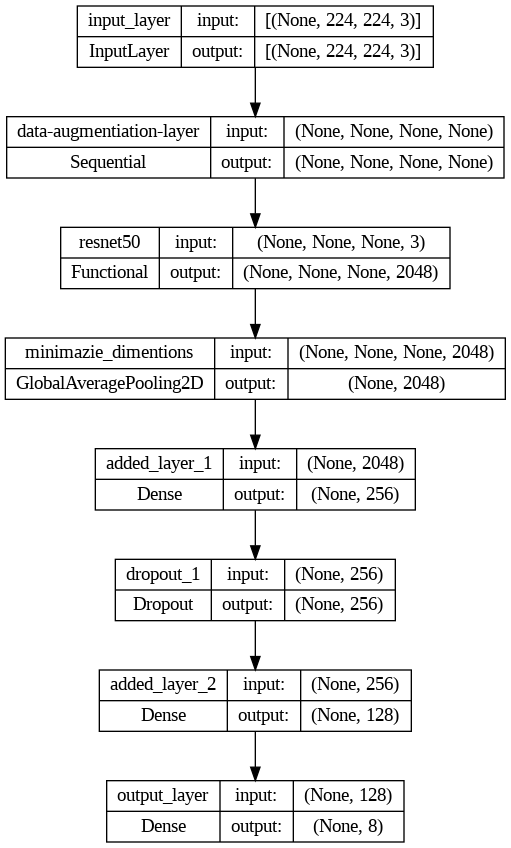

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:

history_dict = model.history

# Plot accuracy
plt.figure(figsize=(10,6))
plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()



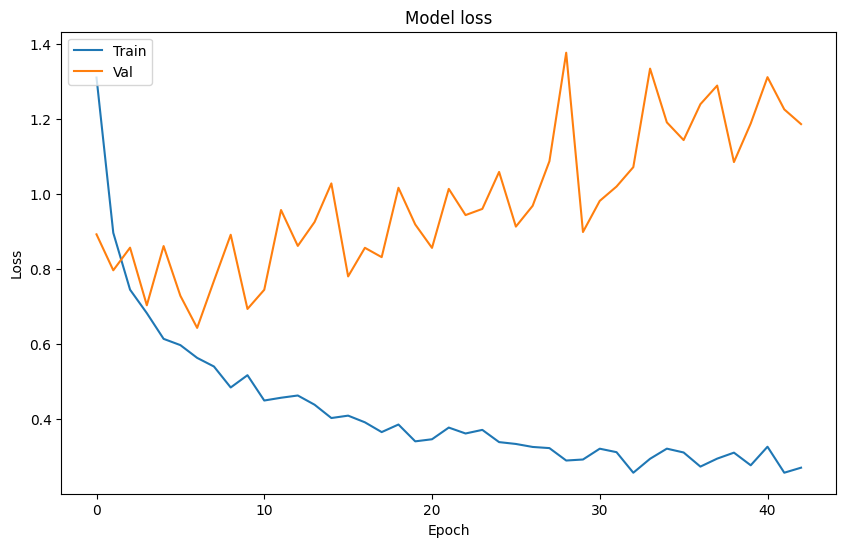

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/models/allModels5cls.h5')

In [ ]:
import cv2
def classifier(img,model,shape)-> int:
    ''''''
    if img is None:
        raise ValueError("Image should not be None")

    img=cv2.imread(img)

    img=cv2.resize(img,dsize=shape)
    # img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

    img=np.expand_dims(img,axis=0)
    pred=model.predict(img,verbose=0)
    idx=np.argmax(pred)
    print('model output: ',pred)

    # values={k:i for i,k in train_batches.class_indices.items()}
    # print(values[idx])
    return idx,pred,model_classes,f'predicted class ==> {model_classes[idx]}'

In [ ]:

img= '/content/drive/MyDrive/data/scalp infection scrapping/scalp infection_0.jpg'
img2= '/content/drive/MyDrive/data/scalp infection scrapping/scalp infection_1.jpg'
img3= '/content/drive/MyDrive/data/scalp infection scrapping/scalp infection_10.jpg'
# img4= '/content/eczema.jpg'
classifier(img,model,[224,224])

### acne

In [ ]:
c=0
path='/content/drive/MyDrive/CollectData/test/skin acne'
for i in os.listdir(path):
  img= path+'/'+i
  c+=1
  print(classifier(img,model,[224,224]))
  if c>105:
    break

model output:  [[ 0.00031837  1.4535e-07  5.8483e-06    0.024599     0.97508]]
(4, array([[ 0.00031837,  1.4535e-07,  5.8483e-06,    0.024599,     0.97508]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> skin acne')
model output:  [[ 2.4105e-05  7.3419e-09    0.096358  1.5004e-05      0.9036]]
(4, array([[ 2.4105e-05,  7.3419e-09,    0.096358,  1.5004e-05,      0.9036]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> skin acne')
model output:  [[  0.0012329  5.6396e-07  0.00024918   0.0098563     0.98866]]
(4, array([[  0.0012329,  5.6396e-07,  0.00024918,   0.0098563,     0.98866]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> skin acne')
model output:  [[    0.45839   0.0010689   0.0084608     0.17086     0.36122]]
(0, array([[    0.45839,   0.0010689,   0.0084608,     0.17086,     0.36122]], dtype=float32), ['Ps

### Psoriasis'

In [ ]:
c=0
path='/content/drive/MyDrive/CollectData/test/Psoriasis'
for i in os.listdir(path):
  img= path+'/'+i
  c+=1
  print(classifier(img,model,[224,224]))
  if c>105:
    break

model output:  [[    0.99976  6.8705e-08  3.8922e-11  0.00024112  1.9841e-07]]
(0, array([[    0.99976,  6.8705e-08,  3.8922e-11,  0.00024112,  1.9841e-07]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> Psoriasis')
model output:  [[    0.11167    0.063843  2.4573e-07     0.23925     0.58524]]
(4, array([[    0.11167,    0.063843,  2.4573e-07,     0.23925,     0.58524]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> skin acne')
model output:  [[ 0.00023192  1.6518e-09  7.4385e-15     0.99977  2.7227e-08]]
(3, array([[ 0.00023192,  1.6518e-09,  7.4385e-15,     0.99977,  2.7227e-08]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> rosacea200')
model output:  [[    0.99969  0.00030139  5.8544e-12  1.3193e-05  2.2573e-10]]
(0, array([[    0.99969,  0.00030139,  5.8544e-12,  1.3193e-05,  2.2573e-10]], dtype=float32), ['P

### Eczema

In [ ]:
c=0
for i in os.listdir('/content/25-type-of-skin/1.Training/Eczema Photos'):
  img= '/content/25-type-of-skin/1.Training/Eczema Photos/'+i
  c+=1
  print(classifier(img,model,[224,224]))
  if c>15:
    break

model output:  [[    0.62092  9.1926e-08  4.4008e-10     0.37908  4.7846e-09]]
(0, array([[    0.62092,  9.1926e-08,  4.4008e-10,     0.37908,  4.7846e-09]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> Psoriasis')
model output:  [[    0.99978  0.00015745  3.7023e-09  6.6997e-05  1.2515e-10]]
(0, array([[    0.99978,  0.00015745,  3.7023e-09,  6.6997e-05,  1.2515e-10]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> Psoriasis')
model output:  [[          1  6.8247e-09  2.5614e-18  2.3141e-09  1.7838e-15]]
(0, array([[          1,  6.8247e-09,  2.5614e-18,  2.3141e-09,  1.7838e-15]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> Psoriasis')
model output:  [[    0.99992  8.5136e-07  3.6877e-16  7.4214e-05  4.5229e-16]]
(0, array([[    0.99992,  8.5136e-07,  3.6877e-16,  7.4214e-05,  4.5229e-16]], dtype=float32), ['Ps

### Normal Skin

In [ ]:
c=0
path='/content/25-type-of-skin/1.Training/Normal Skin'
for i in os.listdir(path):
  img= path+'/'+i
  c+=1
  print(classifier(img,model,[224,224]))
  if c>15:
    break

model output:  [[    0.32698  7.7424e-07     0.46205  8.9863e-06     0.21095]]
(2, array([[    0.32698,  7.7424e-07,     0.46205,  8.9863e-06,     0.21095]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> normal skin')
model output:  [[    0.09999  1.8984e-05     0.89913  0.00027779  0.00058735]]
(2, array([[    0.09999,  1.8984e-05,     0.89913,  0.00027779,  0.00058735]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> normal skin')
model output:  [[    0.25967   2.957e-06     0.73969  0.00042133  0.00021186]]
(2, array([[    0.25967,   2.957e-06,     0.73969,  0.00042133,  0.00021186]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> normal skin')
model output:  [[    0.83614    0.098421    0.046732    0.013945   0.0047654]]
(0, array([[    0.83614,    0.098421,    0.046732,    0.013945,   0.0047654]], dtype=float32)

### Psoriasis

In [ ]:
c=0
path='/content/25-type-of-skin/1.Training/Psoriasis pictures Lichen Dermatosis and related diseases'
for i in os.listdir(path):
  img= path+'/'+i
  c+=1
  print(classifier(img,model,[224,224]))
  if c>15:
    break

model output:  [[    0.98618  2.7037e-05  3.0448e-11    0.013797  2.3192e-07]]
(0, array([[    0.98618,  2.7037e-05,  3.0448e-11,    0.013797,  2.3192e-07]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> Psoriasis')
model output:  [[    0.78125  1.3814e-06   0.0001743  0.00054818     0.21803]]
(0, array([[    0.78125,  1.3814e-06,   0.0001743,  0.00054818,     0.21803]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> Psoriasis')
model output:  [[    0.71369  2.3437e-05  1.4989e-08     0.28627  1.4821e-05]]
(0, array([[    0.71369,  2.3437e-05,  1.4989e-08,     0.28627,  1.4821e-05]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> Psoriasis')
model output:  [[    0.99998   1.467e-05  3.6885e-10  3.0198e-08  6.1797e-06]]
(0, array([[    0.99998,   1.467e-05,  3.6885e-10,  3.0198e-08,  6.1797e-06]], dtype=float32), ['Ps

### Rosacea

In [ ]:
path='/content/skin-disease-rt2-1/train/Rosacea'
c=0
for i in os.listdir(path):
  img= path+'/'+i
  c+=1
  print(classifier(img,model,[224,224]))
  if c>15:
    break

model output:  [[    0.01596  7.3644e-06  1.4394e-07     0.98401  2.7216e-05]]
(3, array([[    0.01596,  7.3644e-06,  1.4394e-07,     0.98401,  2.7216e-05]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> rosacea200')
model output:  [[   3.68e-07  1.8149e-11  1.0007e-12           1  6.1072e-09]]
(3, array([[   3.68e-07,  1.8149e-11,  1.0007e-12,           1,  6.1072e-09]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> rosacea200')
model output:  [[   0.014089  1.8682e-07   6.531e-08     0.98584  6.9717e-05]]
(3, array([[   0.014089,  1.8682e-07,   6.531e-08,     0.98584,  6.9717e-05]], dtype=float32), ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'], 'predicted class ==> rosacea200')
model output:  [[ 1.4762e-08  1.9356e-10  3.6721e-15           1  9.2792e-08]]
(3, array([[ 1.4762e-08,  1.9356e-10,  3.6721e-15,           1,  9.2792e-08]], dtype=float32), [

### Testing

In [ ]:
model_classes=['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne']
classifier('/content/drive/MyDrive/data/train/psoriasis Scrapping/psoriasis_10.jpg',model,[224,224])


model output:  [[9.6066880e-01 6.1627898e-09 2.8309985e-06 3.9288789e-02 3.9538158e-05]]


(0,
 array([[9.6066880e-01, 6.1627898e-09, 2.8309985e-06, 3.9288789e-02,
         3.9538158e-05]], dtype=float32),
 ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'],
 'predicted class ==> Psoriasis')

In [ ]:
classifier('/content/acne.jpg',model,[224,224])


model output:  [[6.2073718e-06 2.7333539e-07 1.1992586e-07 3.9363870e-01 6.0635471e-01]]


(4,
 array([[6.2073718e-06, 2.7333539e-07, 1.1992586e-07, 3.9363870e-01,
         6.0635471e-01]], dtype=float32),
 ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'],
 'predicted class ==> skin acne')

In [ ]:
classifier('/content/2.jpeg',model,[224,224])


model output:  [[3.4640634e-06 3.4598238e-10 9.9999654e-01 9.8588897e-09 1.9045636e-08]]


(2,
 array([[3.4640634e-06, 3.4598238e-10, 9.9999654e-01, 9.8588897e-09,
         1.9045636e-08]], dtype=float32),
 ['Psoriasis', 'eczema', 'normal skin', 'rosacea200', 'skin acne'],
 'predicted class ==> normal skin')

In [ ]:
len(os.listdir('/content/Chronic Eczema'))

1068

In [ ]:
len(os.listdir('/content/Chronic Eczema'))


1068

In [ ]:
# shutil.rmtree('/content/SKIP-1')
shutil.rmtree('/content/psoriasis-skin-dataset')

In [ ]:
len(os.listdir('/content/skin-disease-rt2-1/train/Psoriasis'))

458

In [ ]:
combine_folders('/content/Eczema-Disease-Classification-Using-EfficientNet-Architecture-1/train/Subacute Eczema',
                '/content/Eczema-Disease-Classification-Using-EfficientNet-Architecture-1/train/Chronic Eczema')


len src_dir1 : 222
len src_dir2 : 846


In [ ]:
combine_folders('/content/skin-1/train/normal skin',
                '/content/CollectedDataV2/Normal Skin')


len src_dir1 : 273
len src_dir2 : 1554


In [ ]:
combine_folders('/content/skin-1/valid/normal skin'
,'/content/skin-1/train/normal skin')

len src_dir1 : 6
len src_dir2 : 267


In [ ]:
combine_folders('/content/drive/MyDrive/CollectedDataV2/Chronic Eczema'
,'/content/drive/MyDrive/CollectedDataV2/Eczema Photos')

len src_dir1 : 1068
len src_dir2 : 1461


In [ ]:
shutil.rmtree('/content/drive/MyDrive/CollectedDataV2/Psoriasis pictures Lichen Dermatosis and related diseases')

In [ ]:
dir='/content/drive/MyDrive/CollectedDataV2'
for i in os.listdir(dir):
  print(i.ljust(60), len(os.listdir(dir+'/'+i)))

skin acne                                                    290
Chronic Eczema                                               1068
Normal Skin                                                  1827
Psoriasis pictures Lichen Dermatosis and related diseases    4742
Psoriasis                                                    458
Rosacea                                                      69
Eczema Photos                                                1461
Hair Loss Photos Alopecia and other Hair Diseases            252
PSORIASIS                                                    1752
Acne and Rosacea Photos                                      1134


In [ ]:
move_files('/content/drive/MyDrive/CollectedDataV2/PSORIASIS',
           '/content/drive/MyDrive/CollectData/test/Pspriasis',copy=True)

In [ ]:
dir='/content/drive/MyDrive/CollectData/test'
for i in os.listdir(dir):
  print(i.ljust(60), len(os.listdir(dir+'/'+i)))

Psoriasis                                                    18
skin acne                                                    11
rosacea200                                                   0
eczema                                                       1461
normal skin                                                  31
.ipynb_checkpoints                                           0
